# Monte Carlo Simulation for risk analysis: minimal product cost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

### Mode, minimum, and maximum values of independent variables used in MCA
The independent variable for MCS incluse the total capital investment (Ct), the yearly operating cost (On), the tax percentage (Tn) and the required internal rete of return (r). for the purpose of the simulation, a triangular random distribution is generated with the mode, minimum, and maximum:

In [5]:
# Mode, minimum, maximum values of independent variables used in MCA
ct_mode = 100000
ct_min = ct_mode * 0.8 # -20 %
ct_max = ct_mode * 1.5 # +50 %

tn_mode = 0.40
tn_min = tn_mode * 0.7 # -30 %
tn_max = tn_mode * 1.3 # +30 %

on_mode = 3000000
on_min = on_mode * 0.9 # -10 %
on_max = on_mode * 1.3 # +30 %

r_mode = 0.10
r_min = r_mode * 0.7 # -30 %
r_max = r_mode * 1.3 # +30 %

### Random triangular distribution of variables with <i>''num_points''</i> number of values

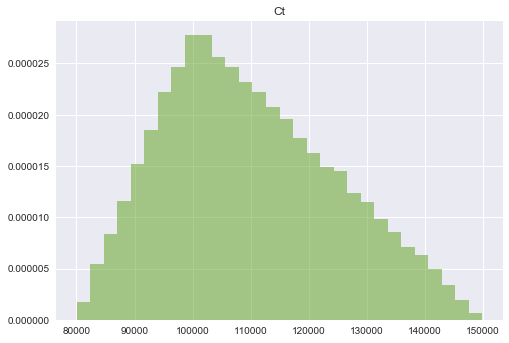

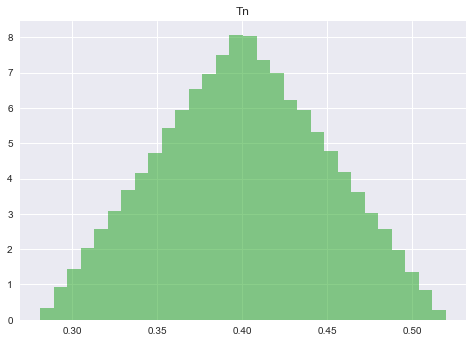

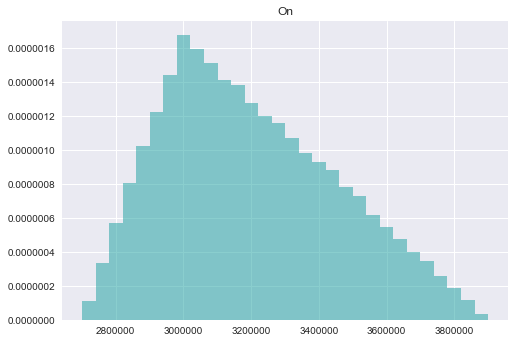

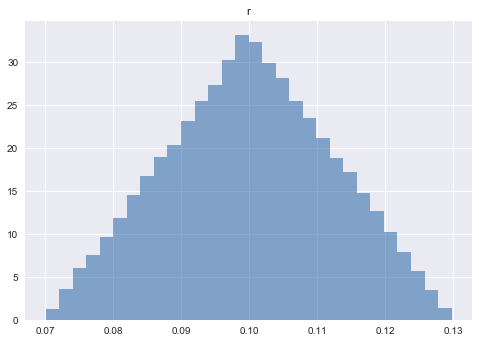

In [6]:
# Triangular distributions
num_points = 100000 # Number of points per distribution
Ct = np.random.triangular(ct_min, ct_mode, ct_max, num_points)
Tn = np.random.triangular(tn_min, tn_mode, tn_max, num_points)
On = np.random.triangular(on_min, on_mode, on_max, num_points)
r = np.random.triangular(r_min, r_mode, r_max, num_points)

e = plt.hist(Ct, bins=30,normed=True, color='#5B9F17', alpha=0.5)
plt.title('Ct')
plt.show()

f = plt.hist(Tn, bins=30,normed=True, color='#179F17', alpha=0.5)
plt.title('Tn')
plt.show()

g = plt.hist(On, bins=30,normed=True, color='#179F9F', alpha=0.5)
plt.title('On')
plt.show()

h = plt.hist(r, bins=30,normed=True, color='#175B9F', alpha=0.5)
plt.title('r')
plt.show()

### Function for finding NPV = 0
To determine the minimal product cost, we should determine the product price (pp) for which the net present value is equal to zero.

In [7]:
def find_zero(pp_min, pp_max, ct, m, tn, on, r, n):
    pp_min, pp_max = float(pp_min), float(pp_max)
    tol = 0.01 #tollerance set to 0.01 $
    
    def NPV(pp): #, ct, m, tn, on, r, n
        # ct - total capital investments, 
        # pp - product price, 
        # m - production capacity, 
        # t - economic lifetime (years), 
        # tn - tax percentage, 
        # on - yearly operating cost, 
        # r - required internal rate of return
        yearly_profit = 0
        profit = 0
        for i in range(1, n+1):
            yearly_profit = (pp * m * (1 - tn) - on) / (1 + r)**i
            profit = profit + yearly_profit
        return  (ct - profit)*-1 
    
    while (pp_max - pp_min) > tol:
        mid = (pp_min + pp_max) / 2
        if NPV(mid) > 0:
            pp_max = mid
        else:
            pp_min = mid
    return mid

### Running the simulation for <i>''num_points''</i> number of random states
To calculate the minimal product cost, we must define the production capacity (m) e.g. mass of product, and economic lifetime of the project. The minimal product cost is calculated for each scenario (random state) within the boundaries defined with pp_min and pp_max.


In [8]:
results = []
pp_min = 10
pp_max = 10000
i = 0
n = 8
m = 10000 # production capacity, kg
while i < num_points:
    pp = find_zero(pp_min, pp_max, Ct[i], m, Tn[i], On[i], r[i], n)
    results.append(pp)
    i = i + 1

### Cumulative probability of minimum product cost

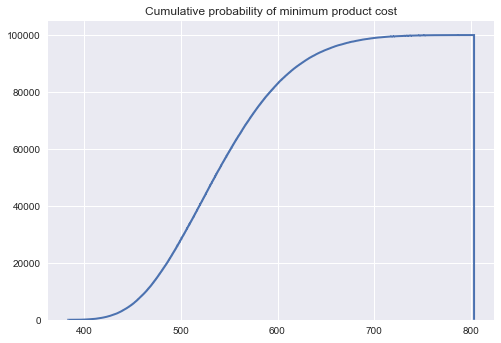

In [9]:
h = plt.hist(results, bins=10000, histtype='step', cumulative=1, linewidth=2)
plt.title('Cumulative probability of minimum product cost')
plt.show()

### Histogram of minimum product cost

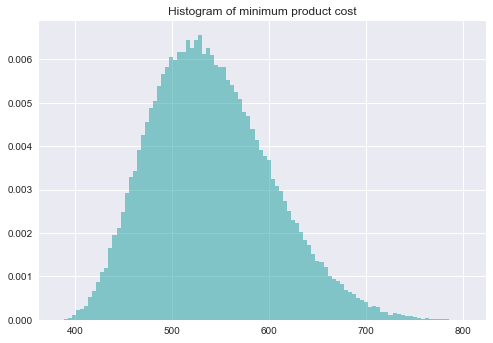

In [10]:
h = plt.hist(results, bins=100,normed=True, color='#179F9F', alpha=0.5)
plt.title('Histogram of minimum product cost')
plt.show()

### MPC for 95% of scenarios

In [11]:
results.sort()
price_95 = results[int(num_points*0.95)]
print('MPC is lower than ' + str(round(price_95, 2)) + ' $/kg in 95% of scenarios.')

MPC is lower than 651.42 $/kg in 95% of scenarios.


### Saving results

In [9]:
df = pd.DataFrame()
df['Product price'] = results
df.to_excel(r'MCS_Results.xlsx', index = False)